# Speedtest Results

This notebook organises, compares and visualises the results from different systems.
<br>
Please follow the instructions below to add your system speed test to the mix.

## Initial Setup

1. Create a directory for your personal computer system right next to my "LEGION" and "ROG" folders.
2. Paste your CSV speedtest results into the new directory. Make sure that the file names are a perfect match to:
   - `cpu_results.csv`
   - `gpu_results.csv`
4. In the code cell below, add your system as a new item in `systems`.
   <br>For example:<br>
`systems = ["LEGION", "ROG", "NEW_ITEM"]`
5. Run the notebook!

## Load Result Data from Local Files
First, we will load the information from the root directories specified in `systems`.
<br>
The data is split between different systems and devices.

In [1]:
import pandas as pd

systems = ["LEGION", "ROG"]
devices = ["CPU", "GPU"]

results = {}

for sys in systems:
    device_results = {}
    for dev in devices:
        device_results[dev] = pd.read_csv(sys + "/" + dev.lower() + "_results.csv")
        device_results[dev]["system"] = sys
        device_results[dev]["device"] = dev
        
    results[sys] = device_results

results["LEGION"]["CPU"].head()

,Unnamed: 0,n_estimators,max_features,random_state,n_features,accuracy,time,system,device
0,0,100.0,sqrt,8.0,1540.0,0.956378,69.618245,LEGION,CPU
1,1,100.0,sqrt,8.0,54.0,0.953796,18.689648,LEGION,CPU
2,2,100.0,1.0,8.0,1540.0,0.967006,732.822737,LEGION,CPU
3,3,100.0,1.0,8.0,54.0,0.968219,31.872830,LEGION,CPU
4,4,250.0,sqrt,8.0,1540.0,0.957092,80.407688,LEGION,CPU


## Unify Results Data
Unify the split data into a single DataFrame.

In [2]:
res = {}

count = 0
for sys in systems:    
    for dev in devices:
        res[count] = results[sys][dev]
        count += 1
        
unified_results = pd.concat(
    [res[i] for i in range(count)],
    ignore_index=True,
    axis=0,
)

print("systems:", set(unified_results["system"]))
print("rows:", unified_results.shape[0])
print("cols:", unified_results.shape[1])

systems: {'LEGION', 'ROG'}
rows: 48
cols: 9


## Filter Results

If you'd like to fetch specific information from the unified dataframe, please use the following syntax

In [3]:
unified_results[
(unified_results['n_estimators'] == 500) &
(unified_results['n_features'] == 1540) &
(unified_results['max_features'] == "1.0") &
(unified_results['system'] == "ROG")
]

,Unnamed: 0,n_estimators,max_features,random_state,n_features,accuracy,time,system,device
34,10,500.0,1.0,8.0,1540.0,0.967712,4581.994421,ROG,CPU
46,10,500.0,1.0,8.0,1540.0,0.890304,226.814192,ROG,GPU


## Visualisation Functions
The following cell contains 2 visualization functions that compare between devices and systems.
<br>
Both functions focus on combinations of the variables:
- `['max_features', 'n_estimators']`
- `['max_features', 'n_features']`
- `['n_features', 'n_estimators']`

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_runtime_by_system(data, combo=['max_features', 'n_estimators']):
    df = pd.DataFrame(data)
    
    # Combine n_features and n_estimators
    df['feature_estimator'] = df[combo[0]].astype(str) + ', ' + df[combo[1]].astype(str)
    
    # create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=False)
    
    # choose colours
    colors = ['blue', 'orange', 'teal', 'red', 'pink', 'cyan', 'magenta', 'yellow']
    # fetch devices
    df_gpu = df[df['device'] == 'GPU']
    df_cpu = df[df['device'] == 'CPU']
    
    pivot_gpu = df_gpu.pivot_table(values='time', index='feature_estimator', columns='system', aggfunc='mean')
    pivot_gpu.plot(kind='bar', ax=ax1, width=0.45, color=colors, legend=False)
    handles, labels = ax1.get_legend_handles_labels()
    ax1.set_title('GPU: Runtime by System')
    ax1.set_xlabel('('+ combo[0] + ', ' + combo[1] + ')')
    ax1.set_ylabel('Time (seconds)')
    ax1.legend(handles, labels, title='System, Avg Time', bbox_to_anchor=(0.7, 0.9), loc='center left')
    ax1.tick_params(axis='x', rotation=45) 
    ax1.autoscale()
    
    pivot_cpu = df_cpu.pivot_table(values='time', index='feature_estimator', columns='system', aggfunc='mean')
    pivot_cpu.plot(kind='bar', ax=ax2, width=0.45, color=colors, legend=False)
    handles, labels = ax2.get_legend_handles_labels()
    ax2.set_title('CPU: Runtime by System')
    ax2.set_xlabel('('+ combo[0] + ', ' + combo[1] + ')')
    ax2.set_ylabel('Time (seconds)')
    ax2.legend(handles, labels, title='System, Avg Time', bbox_to_anchor=(0.7, 0.9), loc='center left')
    ax2.tick_params(axis='x', rotation=45)
    ax2.autoscale()
    
    handles, labels = ax1.get_legend_handles_labels()
    
    # Layout settings
    plt.tight_layout()
    plt.subplots_adjust(right=0.85, wspace=0.2)
    
    plt.show()

def plot_runtime_by_device(data, combo=['max_features', 'n_estimators']):
    df = pd.DataFrame(data)

    # Combine n_features and n_estimators
    df['feature_estimator'] = df[combo[0]].astype(str) + ', ' + df[combo[1]].astype(str)
    
    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
    
    # Choose colours
    colors = ['blue', 'orange', 'pink', 'red', 'teal', 'cyan', 'magenta', 'yellow']
    
    # Fetch systems
    df_legion = df[df['system'] == 'LEGION']
    df_rog = df[df['system'] == 'ROG']
    
    # Subplot 1: LEGION (CPU vs. GPU)
    pivot_legion = df_legion.pivot_table(values='time', index='device', columns='feature_estimator', aggfunc='mean')
    pivot_legion.plot(kind='bar', ax=ax1, width=0.6, color=colors, legend=False)
    handles, labels = ax1.get_legend_handles_labels()
    ax1.set_title('LEGION: Runtime by Device')
    ax1.set_xlabel('LEGION Device')
    ax1.set_ylabel('Time (seconds)')
    ax1.legend(handles, labels, title='('+ combo[0] + ', ' + combo[1] + ')', bbox_to_anchor=(0.45, 0.83), loc='center left')
    ax1.tick_params(axis='x', rotation=0)
    ax1.autoscale()
    
    # Subplot 2: ROG (CPU vs. GPU)
    pivot_rog = df_rog.pivot_table(values='time', index='device', columns='feature_estimator', aggfunc='mean')
    pivot_rog.plot(kind='bar', ax=ax2, width=0.6, color=colors, legend=False)
    handles, labels = ax2.get_legend_handles_labels()
    ax2.set_title('ROG: Runtime by Device')
    ax2.set_xlabel('ROG Device')
    ax2.set_ylabel('Time (seconds)')
    ax2.legend(handles, labels, title='('+ combo[0] + ', ' + combo[1] + ')', bbox_to_anchor=(0.45, 0.83), loc='center left')
    
    ax2.tick_params(axis='x', rotation=0)
    ax2.autoscale()
    
    # Add a shared legend for both subplots
    handles, labels = ax1.get_legend_handles_labels()
    
    # Layout settings
    plt.tight_layout()
    plt.subplots_adjust(right=0.85, wspace=0.2)
    
    plt.show()

## Plot Runtime By System
The following plot will compare the same device across different systems based on combinations of n_features and n_estimators.

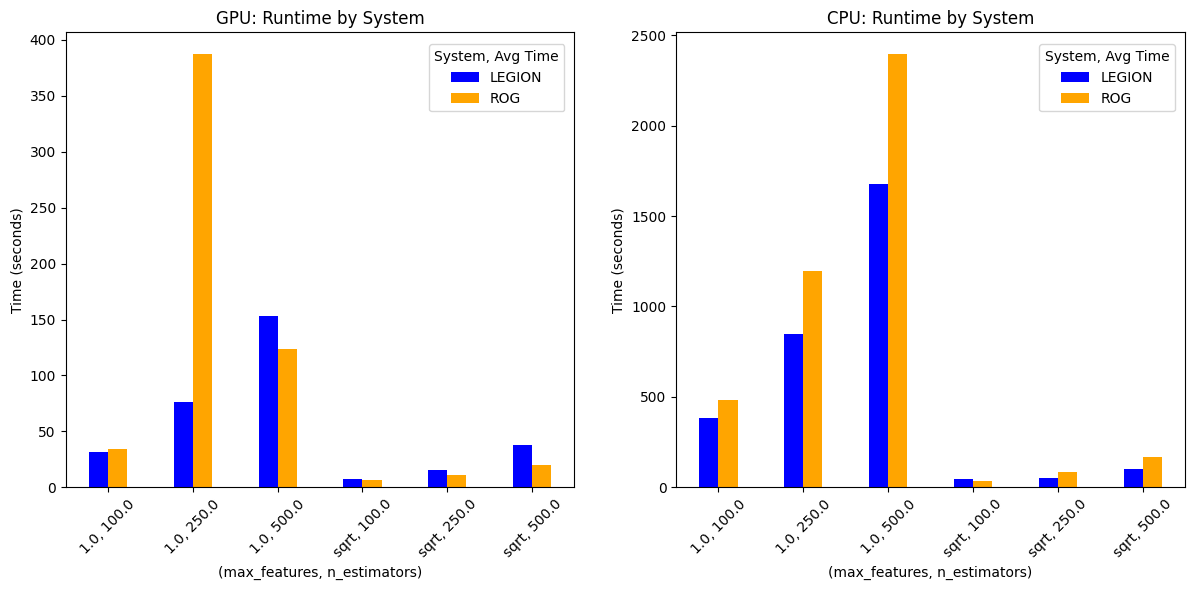

In [28]:
plot_runtime_by_system(unified_results, ['max_features', 'n_estimators'])

## Plot Runtime by Device
The following plot will compare the same system across different devices based on combinations of n_features and n_estimators.

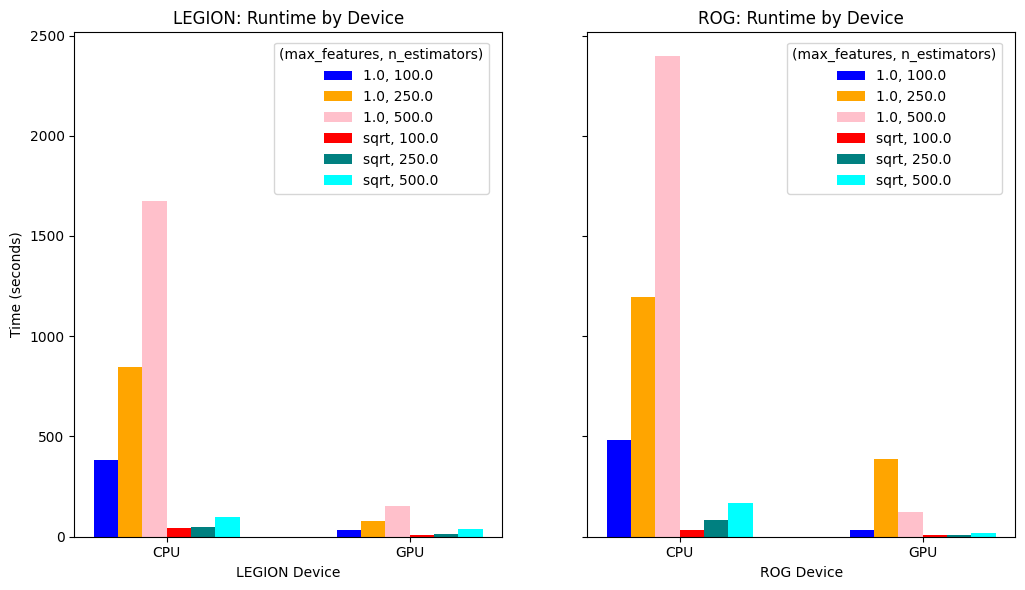

In [33]:
plot_runtime_by_device(unified_results, ['max_features', 'n_estimators'])

## Expanded System Runtime By Device Function
The functions above plot combinations of two variables, while the function below plots combinations of all 3 variables:
<br>
`['max_features', 'n_estimators', 'n_features']`

In [7]:
def expanded_runtime(data, device):
    df = pd.DataFrame(data)
    df_gpu = df[df['device'] == device].copy()
    
    # Create labels for x-axis (combinations)
    df_gpu['combo_label'] = df_gpu.apply(lambda x: f"{int(x['n_features'])} {int(x['n_estimators'])} {x['max_features']}", axis=1)
    combo_labels = df_gpu[df_gpu['system'] == 'LEGION']['combo_label'].unique()
    
    # Prepare data for plotting
    legion_data = df_gpu[df_gpu['system'] == 'LEGION'].sort_values(['n_features', 'n_estimators', 'max_features'])
    rog_data = df_gpu[df_gpu['system'] == 'ROG'].sort_values(['n_features', 'n_estimators', 'max_features'])
    
    # Create the bar chart
    plt.figure(figsize=(14, 6))
    x = range(len(combo_labels))
    bar_width = 0.35  # Width of each bar
    
    # Plot bars for LEGION and ROG side by side
    plt.bar(x, legion_data['time'], width=bar_width, label='LEGION', color='blue', align='center')
    plt.bar([i + bar_width for i in x], rog_data['time'], width=bar_width, label='ROG', color='red', align='center')
    
    # Customize the plot
    plt.xlabel('Parameter Combination (n_features n_estimators max_features)')
    plt.ylabel('Runtime (seconds)')
    plt.title(device + ' Performance Comparison: LEGION vs. ROG')
    plt.xticks([i + bar_width / 2 for i in x], combo_labels, rotation=45, ha='right')
    plt.legend()
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

### Expanded System Runtime On GPU
The following chart plots GPU performance across matching parameters on the ROG and LEGION systems.

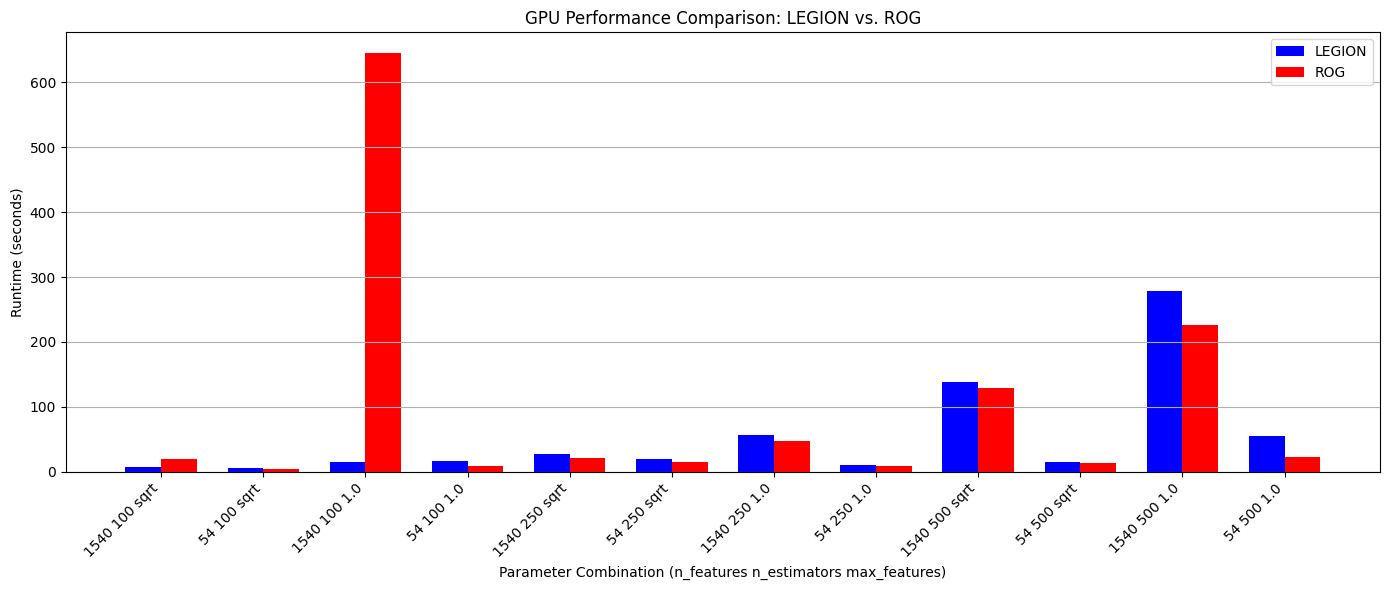

In [8]:
expanded_runtime(unified_results, "GPU")

### Expanded System Runtime On CPU
The following chart plots CPU performance across matching parameters on the ROG and LEGION systems.

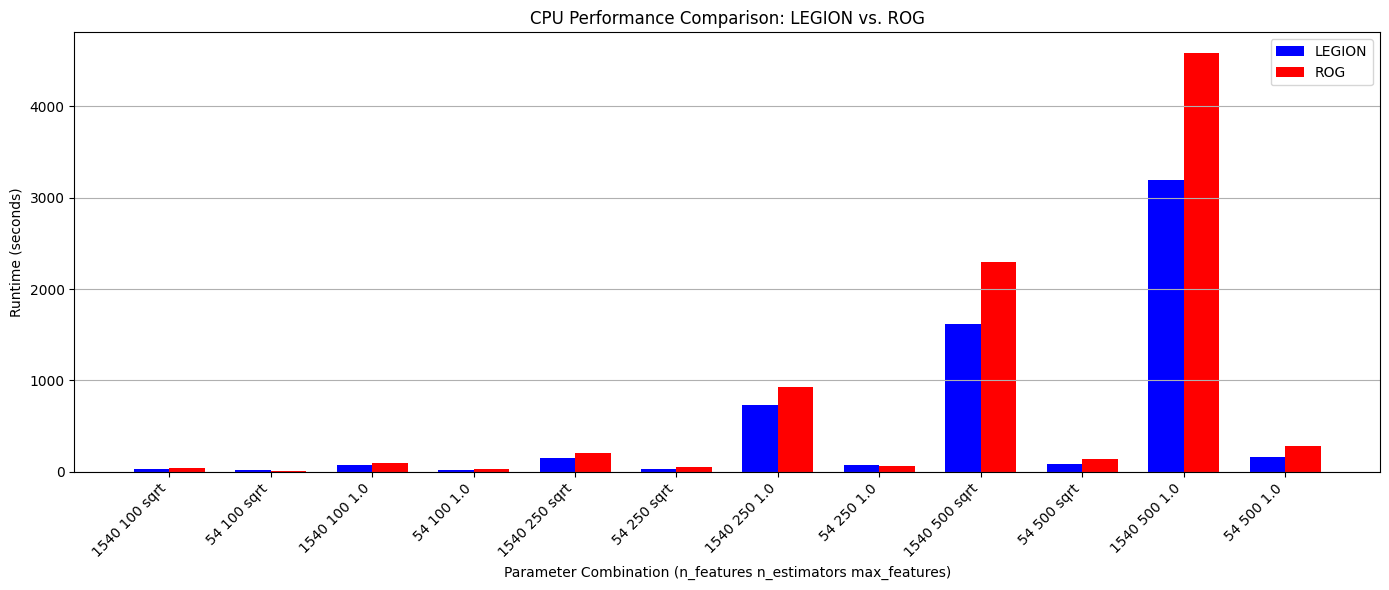

In [9]:
expanded_runtime(unified_results, "CPU")